<a href="https://colab.research.google.com/github/oshvil2020/Global-Tourist-Visitors-Arrival-and-Expenditure/blob/main/Tourist_Visitors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import  libraries and Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [2]:
dfTV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework/Tourist-Visitors/SYB62_T30_201904_Tourist-Visitors Arrival and Expenditure.csv",encoding='latin-1')
dfTV.rename(columns = {"[T30.]":"Region/Country/Area",'Tourist/visitor arrivals and tourism expenditure': 'country', "Unnamed: 2":"Year","Unnamed: 3":"Series","Unnamed: 6": "Value","Unnamed: 8":"Source"}, inplace=True)

dfTV


,Region/Country/Area,country,Year,Series,Unnamed: 4,Unnamed: 5,Value,Unnamed: 7,Source
0,Region/Country/Area,NaN,Year,Series,Tourism arrivals series type,Tourism arrivals series type footnote,Value,Footnotes,Source
1,4,Afghanistan,2010,Tourism expenditure (millions of US dollars),NaN,NaN,147,NaN,"World Tourism Organization (UNWTO), Madrid, th..."
2,4,Afghanistan,2015,Tourism expenditure (millions of US dollars),NaN,NaN,87,NaN,"World Tourism Organization (UNWTO), Madrid, th..."
3,4,Afghanistan,2016,Tourism expenditure (millions of US dollars),NaN,NaN,69,NaN,"World Tourism Organization (UNWTO), Madrid, th..."
4,4,Afghanistan,2017,Tourism expenditure (millions of US dollars),NaN,NaN,19,NaN,"World Tourism Organization (UNWTO), Madrid, th..."
...,...,...,...,...,...,...,...,...,...
2233,716,Zimbabwe,2005,Tourism expenditure (millions of US dollars),NaN,NaN,99,NaN,"World Tourism Organization (UNWTO), Madrid, th..."
2234,716,Zimbabwe,2010,Tourism expenditure (millions of US dollars),NaN,NaN,135,NaN,"World Tourism Organization (UNWTO), Madrid, th..."
2235,716,Zimbabwe,2015,Tourism expenditure (millions of US dollars),NaN,NaN,191,NaN,"World Tourism Organization (UNWTO), Madrid, th..."
2236,716,Zimbabwe,2016,Tourism expenditure (millions of US dollars),NaN,NaN,194,NaN,"World Tourism Organization (UNWTO), Madrid, th..."


## Data Info

In [3]:
dfTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  2238 non-null   object
 1   country              2237 non-null   object
 2   Year                 2238 non-null   object
 3   Series               2238 non-null   object
 4   Unnamed: 4           1159 non-null   object
 5   Unnamed: 5           1 non-null      object
 6   Value                2238 non-null   object
 7   Unnamed: 7           782 non-null    object
 8   Source               2238 non-null   object
dtypes: object(9)
memory usage: 157.5+ KB


# Cleaning Data

In [4]:
dfTV.drop(labels=['Unnamed: 5','Unnamed: 7','Unnamed: 4','Source'],axis=1, inplace= True)
dfTV.drop(0, inplace= True)

In [5]:
dfTV['Value'] = [i.replace(",", "") for i in dfTV['Value']]


# Describe DataFrame

In [6]:
dfTV.describe()

,Region/Country/Area,country,Year,Series,Value
count,2237,2237,2237,2237,2237
unique,219,219,6,2,1603
top,858,Jordan,2010,Tourist/visitor arrivals (thousands),2
freq,12,12,399,1158,16


In [7]:
dfTV['Series'].unique()

array(['Tourism expenditure (millions of US dollars)',
       'Tourist/visitor arrivals (thousands)'], dtype=object)

# Fonctions:

In [8]:
def Column_Mean(dframe, countries,second): # col1, col2
  # finding all countries in DataFrame
  list_country = dframe[countries].unique()
  
  # groupby get mean
  data=[np.round(((dframe[dframe[countries]==list_country[i]])[second].astype(float)).values.mean())  for i in range(len(list_country))]
 
# create a DataFrame
  df=pd.DataFrame(data=data , columns=[second ])
  df[countries] = list_country
  return df

dfT: DataFrame Tourist

In [9]:

dfT=Column_Mean(dfTV[dfTV['Series']=='Tourist/visitor arrivals (thousands)'],"country","Value" )
dfT.rename(columns={'Value':'arrivals'},inplace=True)


In [10]:
dfE=Column_Mean(dfTV[dfTV['Series']=='Tourism expenditure (millions of US dollars)'],"country","Value")
dfE.rename(columns={'Value':'expenditure'},inplace=True)


# merge two DataFrame

In [11]:
df_t= pd.merge(dfT,dfE, on='country',how='inner')
df_t

,arrivals,country,expenditure
0,3672.0,Albania,1368.0
1,1706.0,Algeria,313.0
2,316.0,Angola,590.0
3,64.0,Anguilla,112.0
4,243.0,Antigua and Barbuda,540.0
...,...,...,...
199,625.0,Venezuela (Boliv. Rep. of),760.0
200,6793.0,Viet Nam,6298.0
201,447.0,Yemen,508.0
202,770.0,Zambia,587.0


In [12]:
t_arrivals = df_t["arrivals"].sum()
t_arrivals

1019110.0

In [13]:
df_t.sort_values(by=['arrivals'], ignore_index=True,inplace=True,ascending=False)
top5=df_t[:5]
other=  df_t[5:].sum()
other["country"]="other"
top5 = top5.append(other,ignore_index=True)


# figures

## pie chart

In [14]:
import plotly.express as px

In [17]:
# fig,ax = plt.subplots(nrows= 1, ncols = 1, dpi= 200)
# ax.pie(top5["expenditure"], labels= top5['country'],rotatelabels=True, autopct='%1.1f%%',colors=['b','c','y','g','m','r'])
fig =px.pie( top5, names= top5['country'],values=top5['expenditure'],  title='Top 5 countries with most visitor expenditure (millions of US dollars )')
fig.show()


## bar plot

In [18]:
def figure(dframe, country_number):
  dframe.sort_values(['arrivals'],ascending=False, ignore_index=True,inplace=True)
  x=np.arange(0 , len(dframe[:country_number]) , 1)

  fig , ax= plt.subplots (nrows = 1, ncols= 1 , dpi=200, figsize= (10,5))
  
  ax.bar(x+0.1, dframe[:country_number]['expenditure'], width=0.2, color='r', label = 'Tourism expenditure')
  ax_new=ax.twinx()
  ax_new.bar(x-0.1, dframe[:country_number]['arrivals'], width=0.2, color='b', label = 'Tourist/visitor arrivals')
  ax.set_xticklabels(dframe['country'][:country_number],rotation=90)

  ax.set_ylabel('Numbre')
  ax_new.set_ylabel('Value \n US $')
  ax.set_xticks(np.arange(0, country_number, 1))
  ax_new.legend(loc= 'upper left')
  ax.legend(loc= 'upper right')
  
  # ax.set_yscale('log')

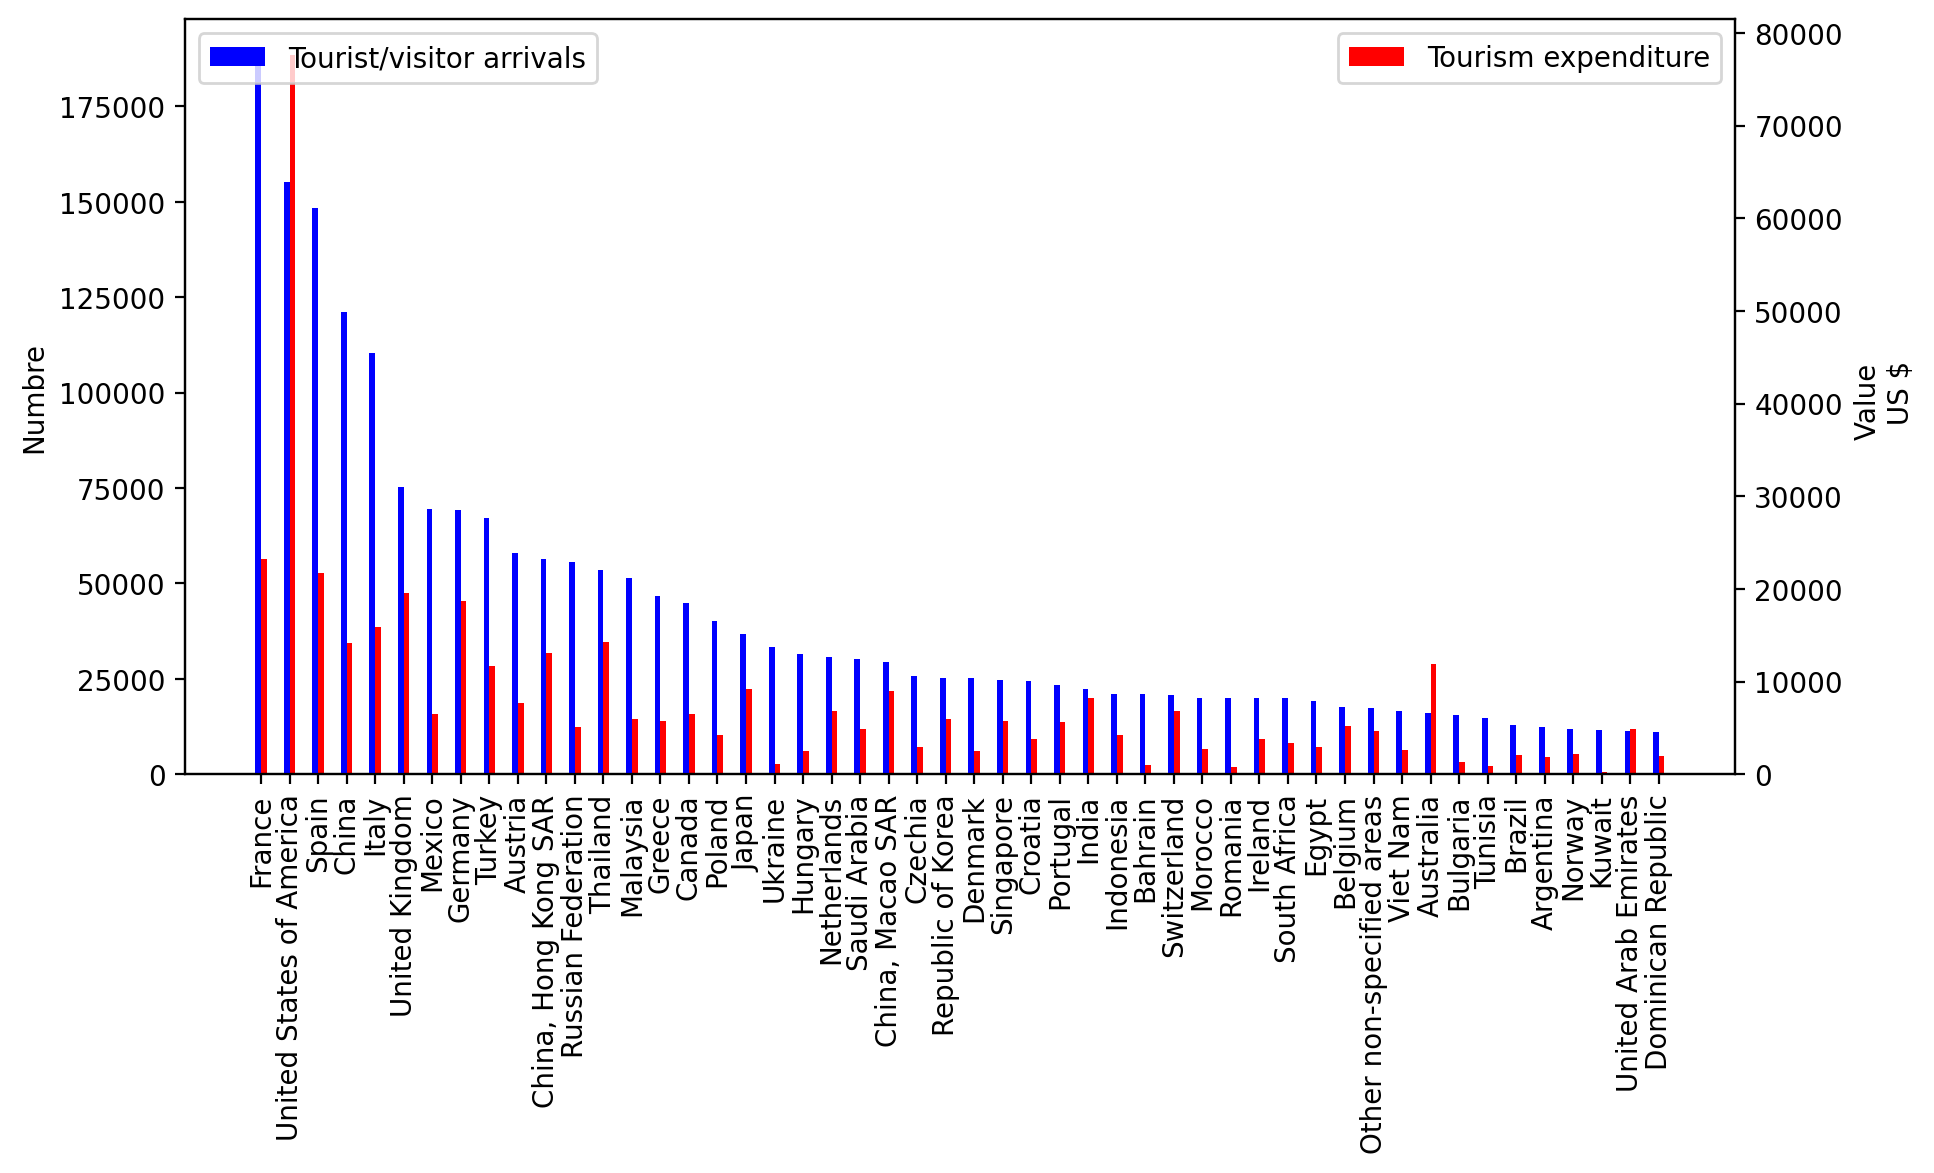

In [19]:
figure(df_t,50)

## bar plot2

In [19]:
def figure2(dframe, country_number):
  dframe.sort_values(['arrivals'],ascending=False, ignore_index=True,inplace=True)
  l = np.arange(0, country_number, 1)
  x=np.arange(0 , len(dframe[:country_number]) , 1)

  fig , ax= plt.subplots (nrows = 1, ncols= 1 , dpi=200, figsize= (10,3))
  
  ax.bar(x, dframe[:country_number]['expenditure']*1000/dframe[:country_number]['arrivals'], width=0.2, color='c', label = 'Tourism expenditure (thousands US$)per arrival')
  ax.set_xticklabels(dframe['country'][:country_number],rotation=90)

  ax.set_ylabel('Value')
  # ax_new.set_ylabel('Value')
  ax.set_xticks(l)
  # ax_new.legend(loc= 'upper left')
  ax.set_title('Tourism expenditure (thousands US$)per arrival')

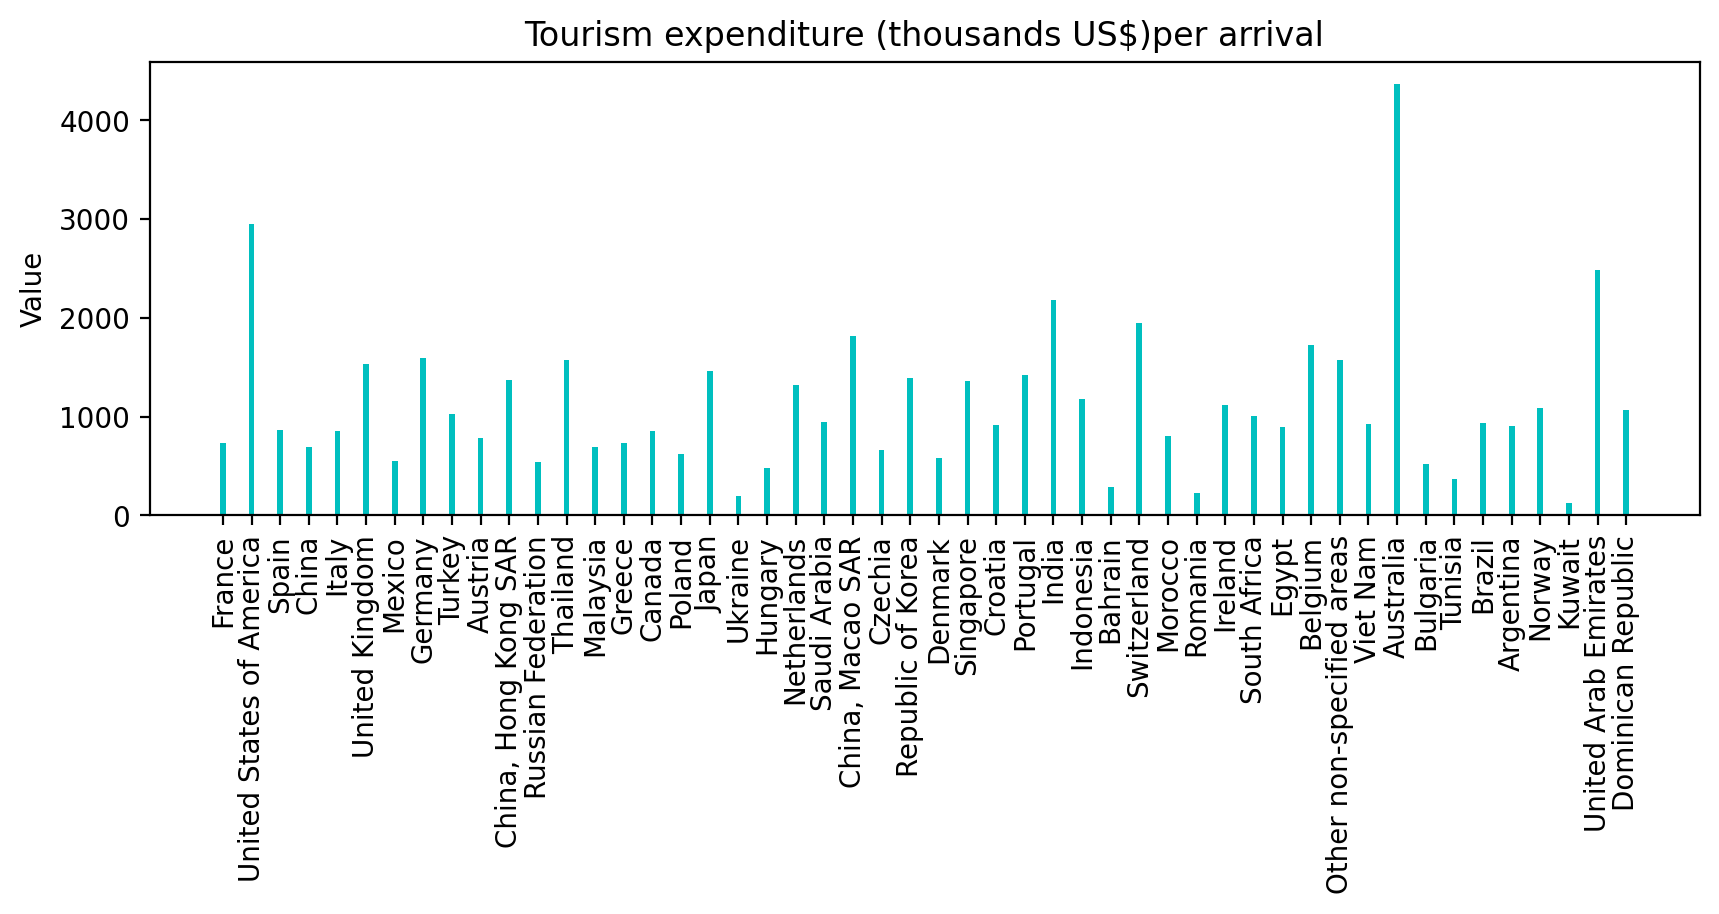

In [20]:
figure2(df_t,50)